# **Lab 6: Baseball Players**

In [58]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
import warnings
from sklearn.exceptions import ConvergenceWarning
#ignore warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [60]:
base = pd.read_csv("https://www.dropbox.com/s/boshaqfgdjiaxh4/Hitters.csv?dl=1")

In [61]:
base = base.dropna()

## **Part 1: Different Model Specs**

### **A. Regression without regularization: linear regression**

In [62]:
X=base.drop(['Salary'], axis = 1)
y= base['Salary']

ct = ColumnTransformer (
    [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
    ],
    remainder = 'passthrough'
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

fitted_lr_pipe = lr_pipeline.fit(X,y)

lr_coeffs = lr_pipeline.named_steps['linear_regression'].coef_

In [63]:
-cross_val_score(lr_pipeline, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

121136.31031816888

In [64]:
feature_names = fitted_lr_pipe[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    fitted_lr_pipe[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

Coefficients
dummify__League_A       -31.299712
dummify__League_N        31.299712
dummify__Division_E      58.424623
dummify__Division_W     -58.424623
dummify__NewLeague_A     12.381163
dummify__NewLeague_N    -12.381163
standardize__AtBat     -291.094556
standardize__Hits       337.830479
standardize__HmRun       37.853837
standardize__Runs       -60.572479
standardize__RBI        -26.994984
standardize__Walks      135.073897
standardize__Years      -16.693359
standardize__CAtBat    -391.038655
standardize__CHits       86.687617
standardize__CHmRun     -14.181723
standardize__CRuns      480.747135
standardize__CRBI       260.689886
standardize__CWalks    -213.892259
standardize__PutOuts     78.761296
standardize__Assists     53.732490
standardize__Errors     -22.160862

### **B. Ridge Regression**

In [65]:
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_reg", Ridge())]
)

degree_ridge = {'ridge_reg__alpha': np.array([.001,.01,.1,1,10,25,100])}

gscv = GridSearchCV(ridge_pipeline, degree_ridge, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted = gscv.fit(X,y)

In [66]:
pd.DataFrame({'Lambda':[.001,.01,.1,1,10,25,100], 'Scores Ridge': gscv_fitted.cv_results_['mean_test_score'], 'Rank': gscv_fitted.cv_results_['rank_test_score']}).sort_values('Rank')

Lambda   Scores Ridge  Rank
3    1.000 -119144.432677     1
4   10.000 -119348.984776     2
5   25.000 -119907.831875     3
2    0.100 -120343.621067     4
6  100.000 -120716.435589     5
1    0.010 -121022.903286     6
0    0.001 -121124.458592     7

In [67]:
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_reg", Ridge(alpha=100))]
)

fit_ridge_pipeline = ridge_pipeline.fit(X,y)

In [68]:
feature_names = fit_ridge_pipeline[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    fit_ridge_pipeline[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

Coefficients
dummify__League_A       -11.051842
dummify__League_N        11.051842
dummify__Division_E      38.023222
dummify__Division_W     -38.023222
dummify__NewLeague_A     -4.091590
dummify__NewLeague_N      4.091590
standardize__AtBat       -0.567370
standardize__Hits        49.612386
standardize__HmRun       -1.464159
standardize__Runs        29.343263
standardize__RBI         22.958015
standardize__Walks       41.384617
standardize__Years       -2.708306
standardize__CAtBat      24.705844
standardize__CHits       44.534276
standardize__CHmRun      38.685330
standardize__CRuns       45.507606
standardize__CRBI        47.145556
standardize__CWalks       4.036371
standardize__PutOuts     56.881522
standardize__Assists      7.457239
standardize__Errors     -13.382390

### **C. Lasso Regression**

In [69]:
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_reg", Lasso())]
)

degree_lasso = {'lasso_reg__alpha': np.array([.001,.01,.1,1,10,25,100])}

gscv = GridSearchCV(lasso_pipeline, degree_lasso, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted = gscv.fit(X,y)
pd.DataFrame({'Lambda':[.001,.01,.1,1,10,25,100], 'Scores lasso': gscv_fitted.cv_results_['mean_test_score'], 'Rank': gscv_fitted.cv_results_['rank_test_score']}).sort_values('Rank')

Lambda   Scores lasso  Rank
3    1.000 -119761.587407     1
2    0.100 -120682.252637     2
1    0.010 -120964.764686     3
0    0.001 -120994.179815     4
4   10.000 -121828.141333     5
5   25.000 -123643.136595     6
6  100.000 -143755.162381     7

In [70]:
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_reg", Lasso(25))]
)

fit_lasso_pipeline = lasso_pipeline.fit(X,y)

In [71]:
feature_names = fit_lasso_pipeline[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    fit_lasso_pipeline[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

Coefficients
dummify__League_A    -0.000000e+00
dummify__League_N     0.000000e+00
dummify__Division_E   3.797256e+01
dummify__Division_W  -1.148522e-12
dummify__NewLeague_A -0.000000e+00
dummify__NewLeague_N  0.000000e+00
standardize__AtBat    0.000000e+00
standardize__Hits     8.241969e+01
standardize__HmRun    0.000000e+00
standardize__Runs     0.000000e+00
standardize__RBI      0.000000e+00
standardize__Walks    4.673844e+01
standardize__Years    0.000000e+00
standardize__CAtBat   0.000000e+00
standardize__CHits    0.000000e+00
standardize__CHmRun   0.000000e+00
standardize__CRuns    7.090511e+01
standardize__CRBI     1.247919e+02
standardize__CWalks   0.000000e+00
standardize__PutOuts  5.589458e+01
standardize__Assists -0.000000e+00
standardize__Errors  -0.000000e+00

### **D. Elastic Net**

In [72]:
elastic_net_pipe = Pipeline(
  [("preprocessing", ct),
  ("elastic_net_reg", ElasticNet())]
)


degree_EN = {'elastic_net_reg__alpha': np.array([.01,.1,1,10, 25, 50, 100]),
             'elastic_net_reg__l1_ratio': np.arange(0, 1, .20)
}


gscv = GridSearchCV(elastic_net_pipe, degree_EN, cv = 5, scoring='neg_mean_squared_error')

gscv_fitted = gscv.fit(X,y)

In [73]:
results_df = pd.DataFrame(gscv_fitted.cv_results_)

resultsdf = results_df[['param_elastic_net_reg__alpha','param_elastic_net_reg__l1_ratio','mean_test_score', 'rank_test_score']]

resultsdf = resultsdf.rename(columns={
    'param_elastic_net_reg__alpha': 'Lambda',
    'param_elastic_net_reg__l1_ratio': 'Alpha',
    'mean_test_score': 'Score'
})
resultsdf.sort_values('rank_test_score').head(5)

Lambda Alpha          Score  rank_test_score
0   0.01   0.0 -118957.967892                1
9    0.1   0.8 -118994.427874                2
1   0.01   0.2 -118995.938080                3
2   0.01   0.4 -119067.258302                4
3   0.01   0.6 -119204.240814                5

In [74]:
elastic_net_pipe = Pipeline(
  [("preprocessing", ct),
  ("elastic_net_reg", ElasticNet(alpha = 1, l1_ratio = .2))]
)

elastic_net_fitted = elastic_net_pipe.fit(X,y)

In [75]:
feature_names = elastic_net_fitted[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    elastic_net_fitted[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

Coefficients
dummify__League_A        -7.248569
dummify__League_N         7.248595
dummify__Division_E      26.103984
dummify__Division_W     -26.103971
dummify__NewLeague_A     -4.116523
dummify__NewLeague_N      4.116546
standardize__AtBat       12.179419
standardize__Hits        37.450668
standardize__HmRun        5.609999
standardize__Runs        27.011028
standardize__RBI         22.983192
standardize__Walks       34.568563
standardize__Years        7.634212
standardize__CAtBat      25.867403
standardize__CHits       36.124822
standardize__CHmRun      32.312440
standardize__CRuns       36.943114
standardize__CRBI        37.880465
standardize__CWalks      15.355773
standardize__PutOuts     44.835142
standardize__Assists      3.836558
standardize__Errors      -8.036185

## **Part 2: Variable Selection**

the numeric variable that is most important is number of hits in that year.

The five numeric variable that are most important are: Hits, Walks, CRuns, CRBI & PutOuts

Division is the most important categorical variable.

### **Using 1 numeric**

In [76]:
def numericreg(Nvariables):
  ct = ColumnTransformer([
    ('standardize', StandardScaler(), list(Nvariables))
  ],
    remainder = 'drop')

  lr_pipe = Pipeline([('preprocessing', ct), ("lr", LinearRegression())])
  ridge_pipe = Pipeline([('preprocessing', ct), ("ridge", Ridge())])
  lasso_pipe = Pipeline([('preprocessing', ct), ("lasso", Lasso())])

  elastic_net_pipe = Pipeline([("preprocessing", ct),("elastic_net_reg", ElasticNet())])

  gscv_fitted = gscv.fit(X,y)

  degree_lasso = {'lasso__alpha': np.array([.001,.01,.1,1,10,25,100])}
  degree_ridge = {'ridge__alpha': np.array([.001,.01,.1,1,10,25,100])}
  degree_EN = {'elastic_net_reg__alpha': np.array([.01,.1,1,10, 25, 50, 100]),
             'elastic_net_reg__l1_ratio': np.arange(0, 1, .20)
  }

  gscv_lasso = GridSearchCV(lasso_pipe, degree_lasso, cv = 5, scoring='neg_mean_squared_error')
  gscv_ridge = GridSearchCV(ridge_pipe, degree_ridge, cv = 5, scoring='neg_mean_squared_error')
  gscv_EN = GridSearchCV(elastic_net_pipe, degree_EN, cv = 5, scoring='neg_mean_squared_error')

  gscv_lasso_fitted = gscv_lasso.fit(X,y)
  gscv_ridge_fitted = gscv_ridge.fit(X,y)
  gscv_EN_fitted = gscv_EN.fit(X,y)

  mse_EN = -gscv_EN_fitted.best_score_
  mse_lasso = -gscv_lasso_fitted.best_score_
  mse_ridge = -gscv_ridge_fitted.best_score_

  mse_lr = -cross_val_score(lr_pipe, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

  best_alpha_lasso = gscv_lasso_fitted.best_params_['lasso__alpha']
  best_alpha_ridge = gscv_ridge_fitted.best_params_['ridge__alpha']
  bestEN_alpha = gscv_EN_fitted.best_params_['elastic_net_reg__alpha']
  bestEN_ratio = gscv_EN_fitted.best_params_['elastic_net_reg__l1_ratio']


  return mse_lasso, mse_ridge, mse_lr, mse_EN, best_alpha_lasso, best_alpha_ridge, bestEN_alpha, bestEN_ratio

In [77]:
numericreg(Nvariables = ('Hits',))

(173061.63450002926,
 172579.2334903728,
 173088.97286444032,
 172586.07756813284,
 10.0,
 25.0,
 0.1,
 0.0)

### **using 5 best numerics**

In [78]:
numericreg(Nvariables = ('Hits', 'Walks', 'CRuns','CRBI', 'PutOuts'))

(121332.6787104678,
 119178.54573480925,
 121332.85377811696,
 118860.74048008672,
 0.1,
 25.0,
 1.0,
 0.8)

### **using 5 best numeric and interaction with categorical**


In [79]:
ct = ColumnTransformer([
    ('standardize', StandardScaler(), ['Hits', 'Walks', 'CRuns','CRBI', 'PutOuts']),
    ('dummify', OneHotEncoder(sparse_output=False), ['Division'])
  ],
    remainder = 'drop').set_output(transform = "pandas")

ct2 = ColumnTransformer(
    [
     ('interaction1',PolynomialFeatures(interaction_only=True), ['standardize__Hits','dummify__Division_E']),
        ('interaction2',PolynomialFeatures(interaction_only=True), ['standardize__Walks','dummify__Division_E']),
        ('interaction3',PolynomialFeatures(interaction_only=True), ['standardize__CRuns','dummify__Division_E']),
        ('interaction4',PolynomialFeatures(interaction_only=True), ['standardize__CRBI','dummify__Division_E']),
        ('interaction5',PolynomialFeatures(interaction_only=True), ['standardize__PutOuts','dummify__Division_E']),
        ],
    remainder = 'passthrough'
)

lr_pipe = Pipeline([('preprocessing1', ct),('preprocessing2', ct2), ("lr", LinearRegression())])
mse_lr = -cross_val_score(lr_pipe, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

In [80]:
ridge_pipe = Pipeline([('preprocessing1', ct),('preprocessing2', ct2), ("ridge", Ridge())])
lasso_pipe = Pipeline([('preprocessing1', ct),('preprocessing2', ct2), ("lasso", Lasso())])
EN_pipe = Pipeline([('preprocessing1', ct),('preprocessing2', ct2), ("EN", ElasticNet())])

In [81]:
degree_lasso = {'lasso__alpha': np.array([.001,.01,.1,1,10,25,100])}
degree_ridge = {'ridge__alpha': np.array([.001,.01,.1,1,10,25,100])}
degree_EN = {'EN__alpha': np.array([.01,.1,1,10, 25, 50, 100]),
             'EN__l1_ratio': np.arange(0, 1, .20)}

gscv_lasso = GridSearchCV(lasso_pipe, degree_lasso, cv = 5, scoring='neg_mean_squared_error')
gscv_ridge = GridSearchCV(ridge_pipe, degree_ridge, cv = 5, scoring='neg_mean_squared_error')
gscv_EN = GridSearchCV(EN_pipe, degree_EN, cv = 5, scoring='neg_mean_squared_error')

gscv_lasso_fitted = gscv_lasso.fit(X,y)
gscv_ridge_fitted = gscv_ridge.fit(X,y)
gscv_EN_fitted = gscv_EN.fit(X,y)

mse_EN = -gscv_EN_fitted.best_score_
mse_lasso = -gscv_lasso_fitted.best_score_
mse_ridge = -gscv_ridge_fitted.best_score_

best_alpha_lasso = gscv_lasso_fitted.best_params_['lasso__alpha']
best_alpha_ridge = gscv_ridge_fitted.best_params_['ridge__alpha']
bestEN_alpha = gscv_EN_fitted.best_params_['EN__alpha']
bestEN_ratio = gscv_EN_fitted.best_params_['EN__l1_ratio']


In [82]:
mse_lasso, mse_ridge, mse_lr, mse_EN, best_alpha_lasso, best_alpha_ridge, bestEN_alpha, bestEN_ratio

(119535.39915981214,
 113949.06397621054,
 130401.97016858232,
 114128.26937923902,
 10.0,
 100.0,
 1.0,
 0.6000000000000001)

The Model that Performed the best was the ridge model With the 5 best numeric variables (Hits, Walk, CRuns, PutOuts and CRBI) as well as the interaction with the categorical variable Division

## **Part 3: Discussion**

### **A. Ridge**

Compare your Ridge models with your ordinary regression models. How did your coefficients compare? Why does this make sense?

In [83]:
coefs_lr = pd.DataFrame(
    fitted_lr_pipe[-1].coef_,
    columns=["LR Coefficients"],
    index=feature_names
)

coefs_ridge = pd.DataFrame(
    fit_ridge_pipeline[-1].coef_,
    columns=["Ridge Coefficients"],
    index=feature_names
)


pd.concat([coefs_lr, coefs_ridge], axis=1)

LR Coefficients  Ridge Coefficients
dummify__League_A          -31.299712          -11.051842
dummify__League_N           31.299712           11.051842
dummify__Division_E         58.424623           38.023222
dummify__Division_W        -58.424623          -38.023222
dummify__NewLeague_A        12.381163           -4.091590
dummify__NewLeague_N       -12.381163            4.091590
standardize__AtBat        -291.094556           -0.567370
standardize__Hits          337.830479           49.612386
standardize__HmRun          37.853837           -1.464159
standardize__Runs          -60.572479           29.343263
standardize__RBI           -26.994984           22.958015
standardize__Walks         135.073897           41.384617
standardize__Years         -16.693359           -2.708306
standardize__CAtBat       -391.038655           24.705844
standardize__CHits          86.687617           44.534276
standardize__CHmRun        -14.181723           38.685330
standardize__CRuns         480.747135           45.507606
standardize__CRBI          260.689886           47.145556
standardize__CWalks       -213.892259            4.036371
standardize__PutOuts        78.761296           56.881522
standardize__Assists        53.732490            7.457239
standardize__Errors        -22.160862          -13.382390

The Coefficients for the Ridge regression are significantly smaller. This makes sense because of the penalty that the ridge regression imposes.

### **B. Lasso**

Compare your LASSO model in I with your three LASSO models in II. Did you get the same lambda results? Why does this make sense? Did you get the same MSEs? Why does this make sense?

Lasso model I: mse = 119761, lambda = 1  
Lasso model II: mse = 173061, lambda = 10  
Lasso model III: mse = 121332, lambda = .1  
Lasso model IV: mse = 119535, lambda = 10

Wegot very siilar results from model 1 and 4 which makes sense since the first model pretty much made all the other variables besides the ones we used 0 due to penalties. For the second and third model we got not so similar results since we included less of the variables that the first lasso deemed to be very important.

### **C. Elastic Net**
Compare your MSEs for the Elastic Net models with those for the Ridge and LASSO models. Why does it make sense that Elastic Net always “wins”?

The Elastic Net MSEs are always the smalles or very close to the smallest. It always wins because it takes the best ratio of the two, so if the lasso is 100% the best, EN will pretty much be a lasso model due to the ratio variable, and vice versa. If the best model is in between, our tuning will find that best value that is in between the two regressions.

## **Part 4: Final Model**

Fit your final best pipeline on the full dataset, and summarize your results in a few short sentences and a plot.

In [84]:
ct = ColumnTransformer([
    ('standardize', StandardScaler(), ['Hits', 'Walks', 'CRuns','CRBI', 'PutOuts']),
    ('dummify', OneHotEncoder(sparse_output=False), ['Division'])
  ],
    remainder = 'drop').set_output(transform = "pandas")

ct2 = ColumnTransformer(
    [
     ('interaction1',PolynomialFeatures(interaction_only=True), ['standardize__Hits','dummify__Division_E']),
        ('interaction2',PolynomialFeatures(interaction_only=True), ['standardize__Walks','dummify__Division_E']),
        ('interaction3',PolynomialFeatures(interaction_only=True), ['standardize__CRuns','dummify__Division_E']),
        ('interaction4',PolynomialFeatures(interaction_only=True), ['standardize__CRBI','dummify__Division_E']),
        ('interaction5',PolynomialFeatures(interaction_only=True), ['standardize__PutOuts','dummify__Division_E']),
        ],
    remainder = 'passthrough'
)

EN_pipe = Pipeline([('preprocessing1', ct),('preprocessing2', ct2), ("EN", ElasticNet(alpha = 1.0, l1_ratio = .5))])

EN_pipe.fit(X,y)

y_pred = EN_pipe.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

mse, r2

(103352.25589815421, 0.4902082596730104)

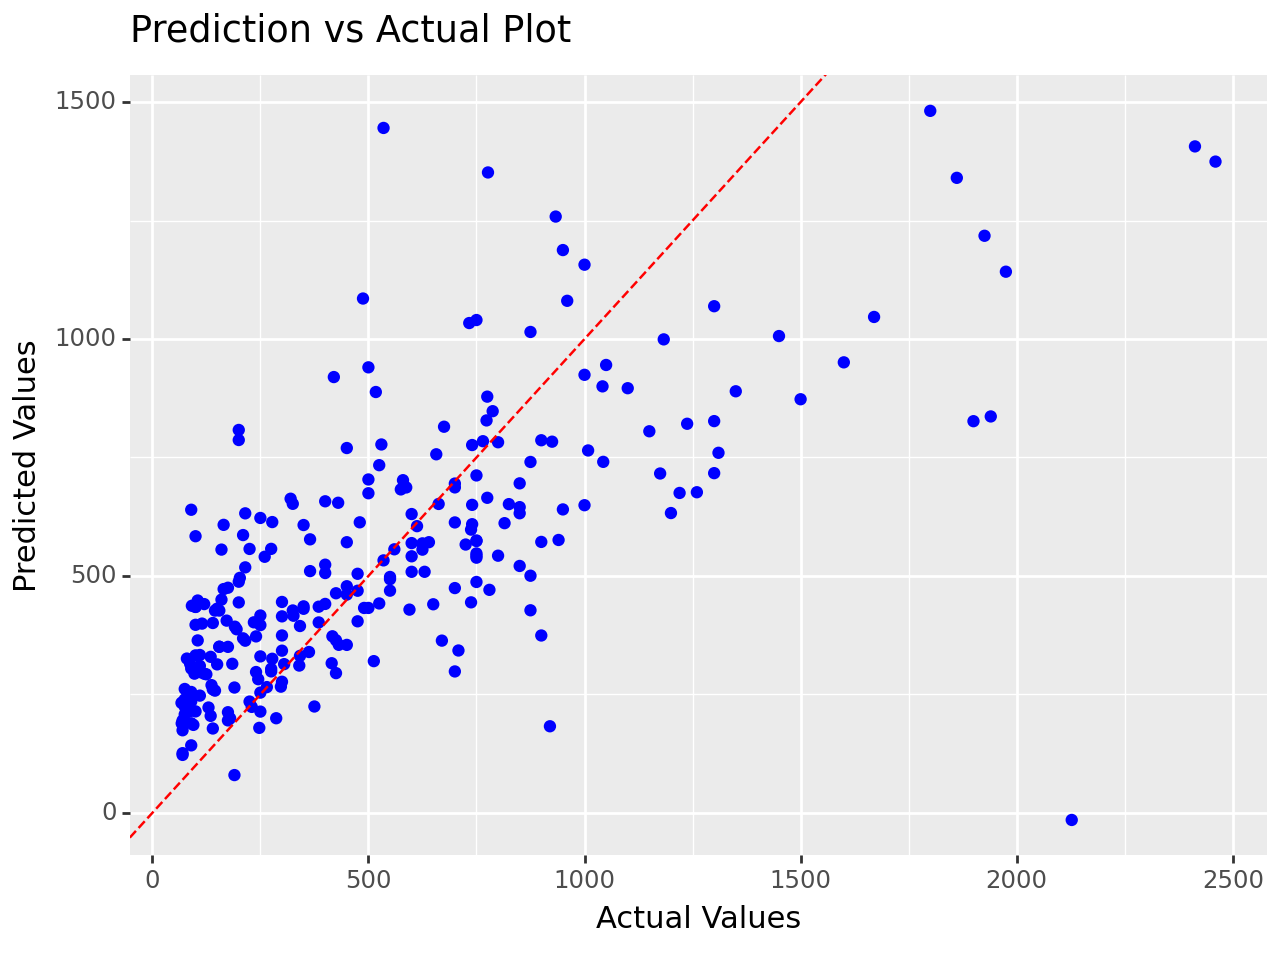

<Figure Size: (640 x 480)>

In [85]:
from plotnine import *
plot_data = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
})

plot = (
    ggplot(plot_data, aes(x='Actual', y='Predicted'))
    + geom_point(color='blue')
    + geom_abline(intercept=0, slope=1, color='red', linetype='dashed')
    + labs(x='Actual Values', y='Predicted Values', title='Prediction vs Actual Plot')
)
plot

Our best model was an elastic net model, which as discussed above makes sense since it takes the best out of lasso and ridge combined. We see in the graph that for most of the data it actually does a good job in predicting besides a few outliers. The r squared is not great at about .5 and the mse also not the best but not too bad of a little over 100000. There could be other possible models that would do a better job at predicting this data with further exploration of different models.